In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainings/Online Retail.xlsx
/kaggle/input/trainings/adult.csv
/kaggle/input/trainings/narendramodi_tweets.csv
/kaggle/input/trainings/employees_attrition.csv
/kaggle/input/trainings/naukri_jobs_datascience.csv
/kaggle/input/trainings/restaurant_reviews.csv
/kaggle/input/trainings/insurance.csv
/kaggle/input/trainings/odi-batting.csv
/kaggle/input/trainings/amazon_reviews_big.csv
/kaggle/input/trainings/bank-full.csv
/kaggle/input/trainings/sales_store_data.csv
/kaggle/input/trainings/IMDB Dataset.csv
/kaggle/input/trainings/sales_data.csv
/kaggle/input/trainings/Advertising.csv
/kaggle/input/trainings/Reviews/Reviews.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sn

# Sentiment Analysis using Text Classification

In [3]:
imdb = pd.read_csv('/kaggle/input/trainings/IMDB Dataset.csv')
print(imdb.shape)
imdb.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
imdb['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
from wordcloud import WordCloud
import re

In [6]:
wc_doc = imdb['review'].str.lower().str.replace('[^a-z\s]','')
wc_doc = ' '.join(imdb['review'])
print(len(wc_doc)), print(type(wc_doc))
print(wc_doc[:100])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


65521550
<class 'str'>
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. The


In [7]:
import nltk
common_stopwords = nltk.corpus.stopwords.words('english')
list(common_stopwords)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
for word in common_stopwords:
    if 'n\'t' in word or 'not' in word:
        common_stopwords.remove(word)

list(common_stopwords)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
# We are analysing movie reviews, so the words film and movie are useless for us
custom_stopwords = ['br', 'amp', 'film', 'movie', 'one',]
all_stopwords = common_stopwords + custom_stopwords

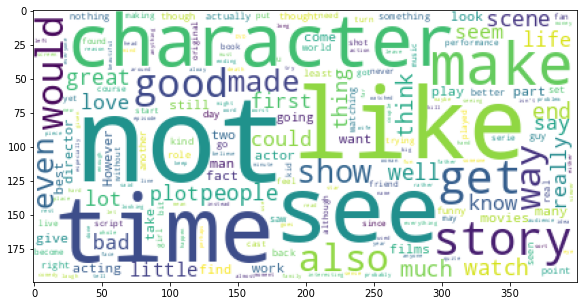

In [10]:
wc = WordCloud(background_color='White', stopwords=all_stopwords).generate(wc_doc)
plt.figure(figsize=(14,5))
plt.imshow(wc);

In [11]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Wordcloud for negative sentiment after stopword removal

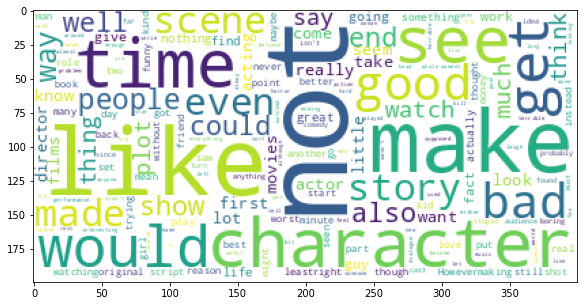

In [12]:
doc_string_negative = imdb[imdb['sentiment']=='negative']
doc_string_negative = ' '.join(doc_string_negative['review'])
wc_negative_sentiment = WordCloud(background_color='white', stopwords=all_stopwords).generate(doc_string_negative)
plt.figure(figsize=(14,5))
plt.imshow(wc_negative_sentiment);

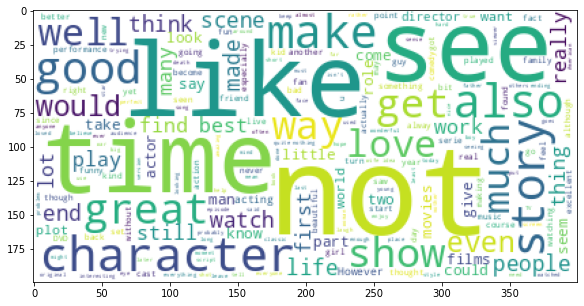

In [13]:
doc_string_positive = imdb[imdb['sentiment']=='positive']
doc_string_positive = ' '.join(doc_string_positive['review'])
wc_positive_sentiment = WordCloud(background_color='white', stopwords=all_stopwords).generate(doc_string_positive)
plt.figure(figsize=(14,5))
plt.imshow(wc_positive_sentiment);

## Check for null values

In [14]:
imdb.isna().sum()

review       0
sentiment    0
dtype: int64

# Stopword Removal and Stemming using gensim library

In [15]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.porter import PorterStemmer

In [16]:
stemmer = PorterStemmer()
docs = imdb['review'].str.lower().str.replace('<br />', '').str.replace('[^a-z\s]', '')
docs = docs.apply(remove_stopwords)
docs = stemmer.stem_documents(docs)
docs = pd.Series(docs)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
trainx, testx, trainy, testy = train_test_split(docs, imdb['sentiment'], test_size=0.2, random_state=3)
vectorizer = CountVectorizer(min_df=10).fit(trainx)
vocab = vectorizer.get_feature_names()
type(vocab)

list

In [19]:
vocab[:10]

['aa',
 'aaa',
 'aag',
 'aaliyah',
 'aamir',
 'aardman',
 'aaron',
 'ab',
 'aback',
 'abandon']

In [20]:
train_dtm = vectorizer.transform(trainx)
test_dtm = vectorizer.transform(testx)

## Building a Multinomial Naive Bayes model for Text Classification using DTM

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [22]:
model = MultinomialNB().fit(train_dtm, trainy)
test_y_pred = model.predict(test_dtm)
print("Accuracy: ", accuracy_score(testy, test_y_pred))

Accuracy:  0.8395


## Now lets build a model by not removing stopwords that are negative.
## In sentiment analysis text preprocessing is very important step and it is also said that removing stopwords increases the accuracy of the model. But stopword removal should be done based on the dataset as it can completely change the context.
## Let's check the accuracy without removing negative intent stopwords

In [23]:

docs = imdb['review'].str.lower().str.replace('<br />', '').str.replace('[^a-z\s]', '')
docs

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [24]:
new_docs = []
for doc in docs:
    single_doc = []
    for word in doc.split(' '):
        if word not in all_stopwords:
            single_doc.append(word)
    single_doc = ' '.join(single_doc)
    new_docs.append(single_doc)

In [25]:
new_docs = pd.Series(new_docs)
new_docs.shape

(50000,)

In [26]:
trainx, testx, trainy, testy = train_test_split(new_docs, imdb['sentiment'], test_size=0.2, random_state=3)
vectorizer = CountVectorizer(min_df=10).fit(trainx)
train_dtm = vectorizer.transform(trainx)
test_dtm = vectorizer.transform(testx)

In [27]:
test_dtm

<10000x24027 sparse matrix of type '<class 'numpy.int64'>'
	with 904074 stored elements in Compressed Sparse Row format>

In [28]:
model = MultinomialNB()
model = model.fit(train_dtm, trainy)
test_y_pred = model.predict(test_dtm)
print("Accuracy: ", accuracy_score(testy, test_y_pred))

Accuracy:  0.8505


# TF-IDF (Term Frequency - Inverse Document Frequency)
It is a way of normalizing DTM to see if we can improve accuracy

* TF gives more weightage to the words that are appearing frequently.
* IDF gives more weightage to the words that are appearing less frequently/rarely.
* When combined they give a balanced weightage accordingly, like
* we cannot guarantee that TF-IDF will increase accuracy of the model all the time. Because when doing sentiment analysis if the negative word appears in all documents, then its weightage is reduced.

<b><u>Formulas:</u><br>
    TF(Ti,Di) = Frequency of Ti in Di/No. of tokens in Di<br>
    IDF(Ti) = log(No. of documents in the corpus/No. of documents in which the term appears)<br>
    TF-IDF = TF(Ti,Di) * IDF(Ti)</b><br>
    where T = Token in document/corpus<br>
          D = Document in the corpus

In [29]:
idf_vectorizer = TfidfVectorizer().fit(trainx)
# You can get all the tokens/terms in the corpus by uncommenting below line code
# vocab = idf_vectorizer.get_feature_names()
train_idf = idf_vectorizer.transform(trainx)
test_idf = idf_vectorizer.transform(testx)

In [30]:
train_idf, test_idf

(<40000x185376 sparse matrix of type '<class 'numpy.float64'>'
 	with 3902495 stored elements in Compressed Sparse Row format>,
 <10000x185376 sparse matrix of type '<class 'numpy.float64'>'
 	with 949416 stored elements in Compressed Sparse Row format>)

In [31]:
model = MultinomialNB()
model = model.fit(train_idf, trainy)
test_y_pred = model.predict(test_idf)
print("Accuracy: ", accuracy_score(testy, test_y_pred))

Accuracy:  0.8593


### The performance of the model is obviously better than the one where all stopwords are removed. Being said that the accuracy is not always improved, compared to model where negative stopwords were removed the TF-IDF model has no/very less improved accuracy

# Sentiment analysis using Rule based methods

<b><u>NOTE:</u></b> Do not perform any text/data cleaning like stopword removal, stemming etc. Removing some html tags and others should be ok.<br>
### For Rule based semtiment analysis we have **VADER ( Valence Aware Dictionary for Sentiment Reasoning)** - A library which has all positive, negative words, emoticons with lexicon score.<br>
* Presence of emoticons, symbols/chars like !, increases intensity score of a sentence.
* VADER gives the compund score of a sentence which ranges from -1 to +1 telling if the sentence is positive/negative.

<u>**Few more points to consider:**<br></u>
VADER works good for short documents (means shorter sentences/reviews), not for very large documents.<br>
There are certain conditions such as the high intensity words like very etc should be present before the positive/negative words Eg: I very much like tea<br>
Furthermore, the approach only evaluates individual words and ignores the context in which they are used. This often leads to errors, particularly for sarcasm and irony.

In [32]:
docs = imdb['review'].str.replace('<br />', '')
docs.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [33]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### Let's test VADER on a single sentence.

In [35]:
sentence = 'i like tea'
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

#### Compound Score is calculated by the formula total_score/<span style='font-size:17px;'>&#8730;total_score^2 + alpha</span>
where total_score = sum of negative, neutral and positive scores

In [36]:
print(analyzer.polarity_scores('i like tea'))
print(analyzer.polarity_scores('i LIKE tea'))
print(analyzer.polarity_scores('i like tea!!!'))
print(analyzer.polarity_scores('i like tea :)'))
print(analyzer.polarity_scores('i very much like tea :)'))

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.236, 'pos': 0.764, 'compound': 0.4995}
{'neg': 0.0, 'neu': 0.229, 'pos': 0.771, 'compound': 0.5229}
{'neg': 0.0, 'neu': 0.154, 'pos': 0.846, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.342, 'pos': 0.658, 'compound': 0.6983}


In [37]:
imdb['docs'] = imdb['review'].str.replace('<br />', '').str.replace('[\.]', '')
imdb['docs'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    One of the other reviewers has mentioned that ...
1    A wonderful little production The filming tech...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: docs, dtype: object

In [38]:
imdb['sentiment_compund_score'] = imdb['review'].apply(lambda v: analyzer.polarity_scores(v)['compound'])
imdb.head()

,review,sentiment,docs,sentiment_compund_score
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,-0.9951
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...,0.9641
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,0.9605
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",0.9744


In [39]:
imdb.rename(columns={'sentiment_compund_score':'sentiment_compound_score'}, inplace=True)

In [40]:
imdb.head(1)

,review,sentiment,docs,sentiment_compound_score
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,-0.9951


<AxesSubplot:ylabel='Frequency'>

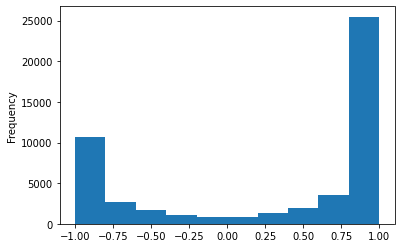

In [41]:
imdb['sentiment_compound_score'].plot.hist()

In [42]:
def get_sentiment_tag(compound_score):
    if compound_score > 0:
        return 'positive'
    else:
        return 'negative'

In [43]:
imdb['sentiment_vader'] = imdb['sentiment_compound_score'].apply(lambda v: get_sentiment_tag(v))
imdb.head(3)

,review,sentiment,docs,sentiment_compound_score,sentiment_vader
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,-0.9951,negative
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...,0.9641,positive
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,0.9605,positive
